## Utför linjär regression

Lutningskoefficient: 2.746
Skärning med y-axel: 0.014
Förklaringsgrad: 0.92


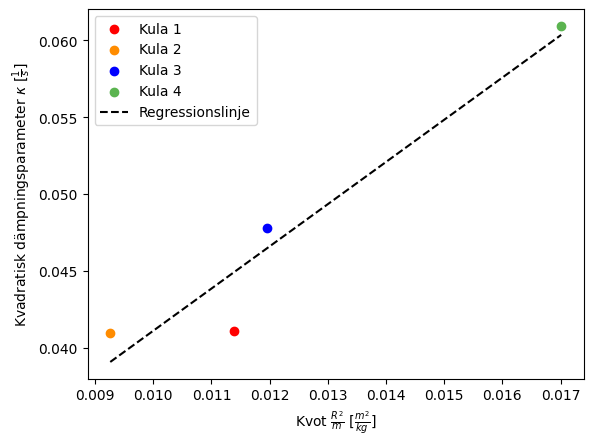

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

def get_filepath(i):
    return f'./../../data_analysis/pt2/data_kula{i}.csv'

# Read CSV files into DataFrames
dfs = []
for ball in range(1, 5):
    filepath = get_filepath(ball)
    df = pd.read_csv(filepath, sep=',', comment='#', header=0)
    dfs.append(df)

df_tot = pd.concat(dfs, ignore_index=True)
df_tot = df_tot.sort_values(by='R^2/m')

fig, ax = plt.subplots()
ax.set_xlabel(r'Kvot $\frac{R^2}{m}$ [$\frac{m^2}{kg}$]')
ax.set_ylabel(r'Kvadratisk dämpningsparameter $\kappa$ [$\frac{1}{s}$]')

ax.scatter(dfs[0]['R^2/m'], dfs[0]['alpha'], color='red', label='Kula 1')
ax.scatter(dfs[1]['R^2/m'], dfs[1]['alpha'], color='darkorange', label='Kula 2')
ax.scatter(dfs[2]['R^2/m'], dfs[2]['alpha'], color='blue', label='Kula 3')
ax.scatter(dfs[3]['R^2/m'], dfs[3]['alpha'], color='#5bb450', label='Kula 4')

slope, intercept, r, p, std_err = linregress(df_tot['R^2/m'], df_tot['alpha'])

x_plot = np.linspace(df_tot['R^2/m'].min(), df_tot['R^2/m'].max())
ax.plot(x_plot, slope * x_plot + intercept, 'k--', label='Regressionslinje')
ax.legend()

print(f'Lutningskoefficient: {slope:.3f}')
print(f'Skärning med y-axel: {intercept:.3f}')
print(f'Förklaringsgrad: {r ** 2:.2f}')